## ResNet101


### Importing Libraries

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.preprocessing import image
from tensorflow.keras.applications import ResNet101V2
import numpy as np
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import os

2024-12-07 15:03:14.553165: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-12-07 15:03:14.670708: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-12-07 15:03:14.719882: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-12-07 15:03:14.732332: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-07 15:03:14.813522: I tensorflow/core/platform/cpu_feature_guar

### Splitting Dataset

In [2]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   validation_split=0.2)

training_set = train_datagen.flow_from_directory('dataset',
                                                 target_size=(224, 224),
                                                 batch_size=32,
                                                 class_mode='categorical',
                                                 subset='training')

validation_set = train_datagen.flow_from_directory('dataset',
                                                   target_size=(224, 224),
                                                   batch_size=32,
                                                   class_mode='categorical',
                                                   subset='validation')

Found 2416 images belonging to 10 classes.
Found 599 images belonging to 10 classes.


### Training Model

In [3]:
base_model = ResNet101V2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))


for layer in base_model.layers[:80]:  
    layer.trainable = False
for layer in base_model.layers[80:]: 
    layer.trainable = True

new_classifier = Sequential([
    GlobalAveragePooling2D(),  
    Dense(1024, activation='relu'),  
    Dropout(0.5),  
    Dense(10, activation='softmax')
])

cnn_model = Sequential([
    base_model,  
    new_classifier
])

cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = cnn_model.fit(training_set, validation_data=validation_set, epochs=10)

I0000 00:00:1733562197.913286    1213 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1733562198.003013    1213 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1733562198.003055    1213 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1733562198.006882    1213 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1733562198.006918    1213 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:0

Epoch 1/10


I0000 00:00:1733562218.620535    1501 service.cc:146] XLA service 0x7f53f0014820 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1733562218.620562    1501 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce RTX 4070 Laptop GPU, Compute Capability 8.9
2024-12-07 15:03:39.214220: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-12-07 15:03:41.493372: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 8907
2024-12-07 15:03:43.994736: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_33725', 8 bytes spill stores, 8 bytes spill loads

2024-12-07 15:03:44.429207: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory

45/76 ━━━━━━━━━━━━━━━━━━━━ 5s 165ms/step - accuracy: 0.7616 - loss: 0.8932

2024-12-07 15:04:22.311610: E external/local_xla/xla/service/slow_operation_alarm.cc:65] Trying algorithm eng34{k2=0,k4=1,k5=1,k6=0,k7=0,k19=0} for conv (f32[16,128,28,28]{3,2,1,0}, u8[0]{0}) custom-call(f32[16,128,28,28]{3,2,1,0}, f32[128,128,3,3]{3,2,1,0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convForward", backend_config={"operation_queue_id":"0","wait_on_operation_queues":[],"cudnn_conv_backend_config":{"conv_result_scale":1,"activation_mode":"kNone","side_input_scale":0,"leakyrelu_alpha":0},"force_earliest_schedule":false} is taking a while...
2024-12-07 15:04:22.312034: E external/local_xla/xla/service/slow_operation_alarm.cc:133] The operation took 1.894829807s
Trying algorithm eng34{k2=0,k4=1,k5=1,k6=0,k7=0,k19=0} for conv (f32[16,128,28,28]{3,2,1,0}, u8[0]{0}) custom-call(f32[16,128,28,28]{3,2,1,0}, f32[128,128,3,3]{3,2,1,0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convForward", b

76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 469ms/step - accuracy: 0.7922 - loss: 0.7885

2024-12-07 15:04:45.013377: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_2985', 188 bytes spill stores, 188 bytes spill loads

2024-12-07 15:04:48.833504: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_2978', 4 bytes spill stores, 4 bytes spill loads

2024-12-07 15:04:49.360448: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_2978', 36 bytes spill stores, 36 bytes spill loads

2024-12-07 15:04:49.399968: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_2978', 12 bytes spill stores, 12 bytes spill loads

2024-12-07 15:04:49.547618: I external/local_xla/xla/stream_

76/76 ━━━━━━━━━━━━━━━━━━━━ 94s 627ms/step - accuracy: 0.7930 - loss: 0.7858 - val_accuracy: 0.2654 - val_loss: 95112.2031
Epoch 2/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 15s 199ms/step - accuracy: 0.9226 - loss: 0.2947 - val_accuracy: 0.2053 - val_loss: 256.5342
Epoch 3/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 13s 174ms/step - accuracy: 0.9549 - loss: 0.1538 - val_accuracy: 0.8097 - val_loss: 1.3899
Epoch 4/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 16s 205ms/step - accuracy: 0.9553 - loss: 0.1487 - val_accuracy: 0.1469 - val_loss: 3697.8384
Epoch 5/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 14s 178ms/step - accuracy: 0.9379 - loss: 0.2813 - val_accuracy: 0.2654 - val_loss: 11081.3535
Epoch 6/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 16s 213ms/step - accuracy: 0.9530 - loss: 0.1724 - val_accuracy: 0.5442 - val_loss: 269.8125
Epoch 7/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 15s 193ms/step - accuracy: 0.9706 - loss: 0.0894 - val_accuracy: 0.9466 - val_loss: 0.1802
Epoch 8/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 14s 182ms/step - accuracy: 0.9900 - loss: 0.0378 - val_

### Extracting Image Features

In [4]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

def extract_features_fixed(image_path, base_model):
    img = load_img(image_path, target_size=(224, 224))  
    img_array = img_to_array(img) / 255.0 
    img_array = np.expand_dims(img_array, axis=0)  
    features = base_model.predict(img_array)  
    return features.flatten()

def create_feature_list(dataset_dir, base_model):
    features_list = []
    image_paths = []
    
    for subdir, dirs, files in os.walk(dataset_dir):
        for file in files:
            if file.endswith(('jpg', 'jpeg', 'png')):
                file_path = os.path.join(subdir, file)
                features = extract_features_fixed(file_path, base_model)
                features_list.append(features)
                image_paths.append(file_path)
    
    return np.array(features_list), image_paths

features_list, image_paths = create_feature_list("dataset", base_model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━

### Finding Nearest Neighbors

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Nearest images to dataset/watch/image_0013.jpg:
dataset/watch/image_0013.jpg - Distance: 0.0000
dataset/watch/image_0199.jpg - Distance: 0.2081
dataset/watch/image_0021.jpg - Distance: 0.2699
dataset/watch/image_0009.jpg - Distance: 0.2844
dataset/watch/image_0239.jpg - Distance: 0.2870
dataset/watch/image_0063.jpg - Distance: 0.2964
dataset/watch/image_0098.jpg - Distance: 0.3023
dataset/watch/image_0073.jpg - Distance: 0.3042
dataset/watch/image_0171.jpg - Distance: 0.3055
dataset/watch/image_0099.jpg - Distance: 0.3073


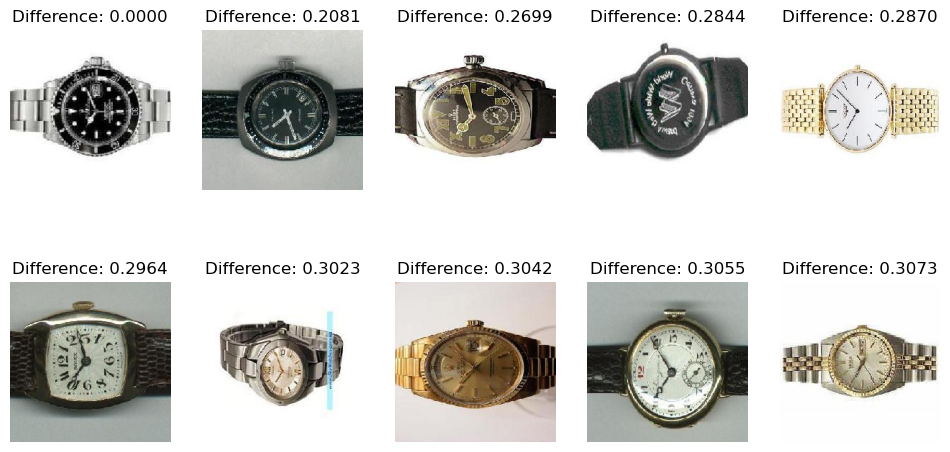

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Nearest images to photos/tt.jpg:
dataset/hawksbill/image_0040.jpg - Distance: 0.4055
dataset/hawksbill/image_0028.jpg - Distance: 0.4235
dataset/hawksbill/image_0003.jpg - Distance: 0.4317
dataset/hawksbill/image_0074.jpg - Distance: 0.4516
dataset/Leopards/image_0003.jpg - Distance: 0.4583
dataset/hawksbill/image_0037.jpg - Distance: 0.4591
dataset/hawksbill/image_0069.jpg - Distance: 0.4594
dataset/hawksbill/image_0039.jpg - Distance: 0.4607
dataset/hawksbill/image_0035.jpg - Distance: 0.4721
dataset/hawksbill/image_0060.jpg - Distance: 0.4779


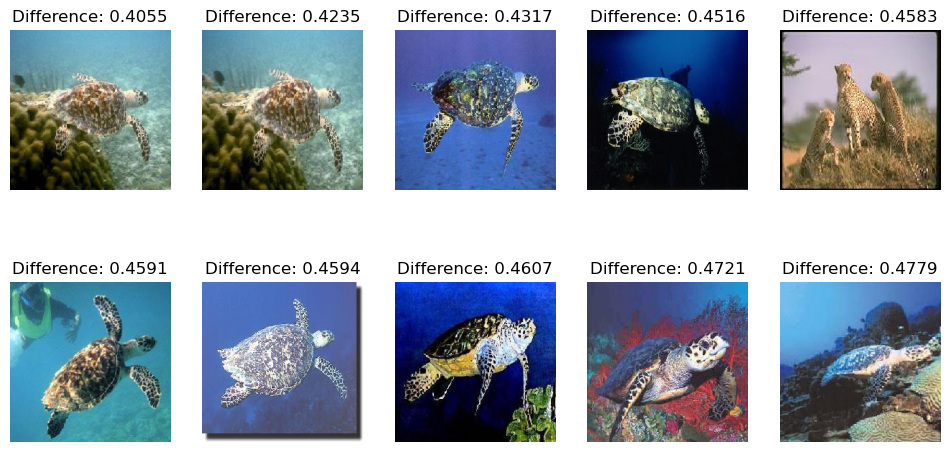

In [7]:
def find_nearest_images(image_path, base_model, n_neighbors=10):
    
    image_features = extract_features_fixed(image_path, base_model)
    
    neighbors = NearestNeighbors(n_neighbors=n_neighbors, metric='cosine')
    neighbors.fit(features_list)
    
    distances, indices = neighbors.kneighbors([image_features])
    
    print(f"Nearest images to {image_path}:")
    for i in range(n_neighbors):
        print(f"{image_paths[indices[0][i]]} - Distance: {distances[0][i]:.4f}")
    
    plt.figure(figsize=(12, 6))
    for i in range(n_neighbors):
        img = load_img(image_paths[indices[0][i]], target_size=(224, 224))
        plt.subplot(2, 5, i+1)
        plt.imshow(img)
        plt.axis('off')
        plt.title(f"Difference: {distances[0][i]:.4f}")
    plt.show()

find_nearest_images('dataset/watch/image_0013.jpg', base_model, n_neighbors=10)
find_nearest_images('photos/tt.jpg', base_model, n_neighbors=10)